# **Strategi Retensi Berbasis Data: Sistem Peringatan Dini untuk Mencegah Churn Pelanggan**

## **Business Problem Understanding**


### **Context**

Industri telekomunikasi (telco) memiliki persaingan yang sangat ketat karena pelanggan dapat dengan mudah membandingkan harga, kualitas layanan, dan paket dari berbagai penyedia. Kondisi ini membuat churn pelanggan (berhenti berlangganan) menjadi masalah krusial yang berdampak langsung pada pendapatan dan biaya operasional perusahaan. Selain kehilangan revenue, perusahaan juga perlu mengeluarkan biaya lebih besar untuk mengakuisisi pelanggan baru dibanding mempertahankan pelanggan yang sudah ada, sehingga retensi pelanggan menjadi prioritas strategis.
<br>

 Berdasarkan dataset Telco Customer Churn yang berisi data pelanggan dan atribut layanan (misalnya kontrak, metode pembayaran, jenis layanan internet, tenure, dan biaya bulanan), churn cenderung memiliki pola yang dapat dipelajari dari data historis. Perusahaan ingin mengetahui customer yang memiliki potensi churn (berhenti berlangganan).

Target:

0 : Customer tidak churn

1 : Customer churn

### **Problem Statement**

Masalah utamanya adalah **ketidakmampuan perusahaan saat ini untuk membedakan antara pelanggan setia dan pelanggan yang berada di ambang keputusan untuk berhenti**. Tanpa wawasan prediktif, tim retensi terpaksa menggunakan pendekatan generalisasi (misalnya, memberikan diskon kepada semua orang atau tidak sama sekali), yang mengakibatkan inefisiensi anggaran yang masif. Perusahaan membuang uang insentif untuk pelanggan yang tidak berniat pergi (False Positive), atau lebih buruk lagi, gagal mengintervensi pelanggan bernilai tinggi yang akhirnya pindah ke kompetitor (False Negative)


### **Goals**

Maka berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk **memprediksi kemungkinan customer akan/ingin berhenti berlangganan atau tidak**, sehingga dapat memfokuskan pemberian anggaran untuk menjaga customer untuk berlangganan serta mengefisiensikan biaya retensi pelanggan.

Dan juga, perusahaan ingin mengetahui **apa/faktor/variabel apa yang membuat customer untuk tetap berlanggan produk mereka atau tidak**, sehingga mereka dapat membuat rencana yang lebih baik dalam menjaga customer yang potensial (customer yang ingin berhenti langganan jasa mereka) .

### **Analytic Approach**

Jadi yang akan kami lakukan adalah menganalisis data untuk menemukan pola yang membedakan customer yang berencana untuk berhenti berlangganan produk atau tidak. Kemudian kami akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas customer yang berencana berhenti berlangganan produk.

Kami membingkai masalah ini sebagai *supervised binary classification*. Target variabel adalah kolom Churn (Yes/No). Berikut gambaran umum langkah-langkah prediksi customer yang akan churn.

1.    Membersihkan data, menangani *missing values* pada TotalCharges, dan melakukan encoding variabel kategorikal.
2.   Explore: Melakukan Exploratory Data Analysis (EDA) mendalam untuk memahami distribusi dan korelasi. Hal ini dilakukan untuk mengetahui intervensi yang tepat.
3. Model: Melatih model dengan validasi silang (*Cross-Validation*) untuk stabilitas.
4. Interpret: Menggunakan SHAP untuk mengetahui faktor yang berpengaruh terhadap customer churn

### **Metric Evaluation**

| **ACTUAL \ PREDICTED** | **Tidak Churn (0)** | **Churn (1)** |
|---|---|---|
| **Tidak Churn (0)** | **TRUE NEGATIVE (TN)**  <br>Model memprediksi pelanggan **tidak churn** dan aktualnya **tidak churn** | **FALSE POSITIVE (FP)** <br>Model memprediksi pelanggan **churn**, padahal aktualnya **tidak churn** |
| **Churn (1)** | **FALSE NEGATIVE (FN)** <br>Model memprediksi pelanggan **tidak churn**, padahal aktualnya **churn** | **TRUE POSITIVE (TP)** <br>Model memprediksi pelanggan **churn** dan aktualnya **churn** |

**Type 1 Error : False Negatif**   
Konsekunsi : Berdampak kepada meningkatnya biaya akuisi customer

**Type 2 Error : False Positif**  
Konsekunsi : Berdampak kepada meningkatnya Biaya retensi / customer

<br>

Dalam kasus churn, akurasi bukanlah metrik yang memadai karena ketidakseimbangan kelas (biasanya jumlah yang churn lebih sedikit daripada yang bertahan).
Kami menetapkan metrik utama berdasarkan dampak finansial dengan pertimbangan sebagai berikut:
<br>

**Simulasi Perhitungan Kerugian**

| Komponen | Nilai | Penjelasan |
| :--- | :--- | :--- |
| Jumlah customer | 10.000 | basis populasi |
| Churn rate aktual | 10% | 1.000 customer churn |
| Biaya retensi / customer | **Rp100.000** | diskon, call center, voucher |
| Biaya akuisisi (CAC) | **Rp1.500.000** | marketing + sales |
| Average CLV hilang | **Rp3.000.000** | revenue masa depan |

<br>

* **Loss FN (Gagal Deteksi)**
    = CAC + CLV
    = 1.500.000 + 3.000.000 = Rp4.500.000

* **Loss FP (Salah Deteksi)**
    = Cost Retention
    = Rp100.000

> **Kesimpulan:** 1 False Negative (FN) sebanding kerugiannya dengan **45 False Positive (FP)**.

**F2-Score:** Metrik ini memberikan bobot lebih besar pada Recall dibandingkan Precision.

**Alasan Pemilihan:** Kami memprioritaskan Recall karena setiap customer churn yang tidak terdeteksi menyebabkan biaya akuisisi baru dan kehilangan lifetime value yang jauh lebih besar dibandingkan biaya retensi. Model dengan recall tinggi secara langsung menurunkan total business loss.




<br>


### **Stakeholder**

Customer Success / Customer Experience (CX) Team yang memiliki taggung jawab dalam mengelola program retensi pelanggan dan menjaga loyalitas jangka panjang. Peran Model: Berfungsi sebagai sistem deteksi dini (Early Warning System) yang memungkinkan tim CX melakukan langkah preventif sebelum pelanggan memutuskan untuk berhenti berlangganan


## **Data Understanding**

Untuk menjawab pertanyaan di atas, kita akan menganalisa menggunakan Dataset yang dapat diakses [di sini](https://drive.google.com/file/d/1nq-5utGNnadiNFXcSI3D101DH1azT5Tj/view?usp=sharing)

### **Attribute Information**

Langkah pertama adalah memuat data dan memahami struktur awalnya. Berikut penjelasan tipe dan deskripsi setiap kolom :
| Column Name | Data Type | Description |
| :--- | :--- | :--- |
| `customerID` | Object | ID unik setiap pelanggan |
| `gender` | Object | Jenis kelamin pelanggan (Male/Female) |
| `SeniorCitizen` | Int64 | Apakah pelanggan lansia (1 = Ya, 0 = Tidak) |
| `Partner` | Object | Apakah pelanggan memiliki pasangan (Yes/No) |
| `Dependents` | Object | Apakah pelanggan memiliki tanggungan (Yes/No) |
| `tenure` | Int64 | Lama pelanggan berlangganan (dalam bulan) |
| `PhoneService` | Object | Apakah memiliki layanan telepon (Yes/No) |
| `MultipleLines` | Object | Apakah memiliki banyak sambungan telepon |
| `InternetService` | Object | Jenis penyedia internet (DSL, Fiber optic, No) |
| `OnlineSecurity` | Object | Layanan keamanan online |
| `OnlineBackup` | Object | Layanan backup online |
| `DeviceProtection` | Object | Layanan asuransi perangkat |
| `TechSupport` | Object | Layanan dukungan teknis |
| `StreamingTV` | Object | Layanan streaming TV |
| `StreamingMovies` | Object | Layanan streaming film |
| `Contract` | Object | Jangka waktu kontrak (Month-to-month, One year, Two year) |
| `PaperlessBilling` | Object | Tagihan tanpa kertas/digital (Yes/No) |
| `PaymentMethod` | Object | Metode pembayaran |
| `MonthlyCharges` | Float64 | Tagihan yang dibebankan setiap bulan |
| `TotalCharges` | Object | Total tagihan yang dibayarkan selama berlangganan |
| `Churn` | Object | Target: Apakah pelanggan berhenti berlangganan? (Yes/No) |

Gambaran dari struktur kolom yang ada di dataset. Kolom  dapat dikelompokan menjadi Identitas, Demografi, Relasi/kontrak, Layanan, dan Biaya
  
1.   Identitas
        - `customerID`
2.   Demografi   
      - `gender`, `SeniorCitizen` (0/1), `Partner`, `Dependents`
3.   Relasi & kontrak
        - `tenure` (lama berlangganan/bulan)
        - `Contract`, `PaperlessBilling`, `PaymentMethod`
4.   Layanan
        - `PhoneService`, `MultipleLines`
        - `InternetService`
        - Add-ons: `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`
        - Hiburan: `StreamingTV`, `StreamingMovies`
5.  Biaya
      - `MonthlyCharges` (float)
      - `TotalCharges`




In [ ]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb


# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

### **Data Loading & Informasi**

In [ ]:
# Load Data dan 5 baris pertama
url = "https://drive.google.com/uc?export=download&id=1nq-5utGNnadiNFXcSI3D101DH1azT5Tj"
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Gambaran umum dataset :
1. Jumlah baris: 7.043 (customer)
2. Jumlah kolom: 21
3. Target/label: Churn (Yes/No)
4. Keunikan ID: customerID unik (tidak ada duplikat)

In [ ]:
# Mengecek tipe data dan missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Melihat statistik deskriptif dari kolom numerik
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### **Unique Data dari Categorical**

In [ ]:
# Melihat unique values pada setiap kolom
rows = []
for col in df.columns:
    dtype = df[col].dtype
    missing = df[col].isna().sum()
    missing_pct = round(missing / len(df) * 100, 2)
    nunique = df[col].nunique()

    if dtype == "object":
        sample = df[col].dropna().astype(str).unique()[:5].tolist()
    else:
        sample = [df[col].min(), df[col].max()]

    rows.append([col, dtype, missing, missing_pct, nunique, sample])

dfDesc = pd.DataFrame(
    rows,
    columns=["column", "dtype", "missing", "missing_pct(%)", "n_unique", "sample_values"]
)

dfDesc


,column,dtype,missing,missing_pct(%),n_unique,sample_values
0,customerID,object,0,0.0,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
1,gender,object,0,0.0,2,"[Female, Male]"
2,SeniorCitizen,int64,0,0.0,2,"[0, 1]"
3,Partner,object,0,0.0,2,"[Yes, No]"
4,Dependents,object,0,0.0,2,"[No, Yes]"
5,tenure,int64,0,0.0,73,"[0, 72]"
6,PhoneService,object,0,0.0,2,"[No, Yes]"
7,MultipleLines,object,0,0.0,3,"[No phone service, No, Yes]"
8,InternetService,object,0,0.0,3,"[DSL, Fiber optic, No]"
9,OnlineSecurity,object,0,0.0,3,"[No, Yes, No internet service]"


## **Data Cleaning**

### **Identify Missing Values, Anomaly, & Duplicates**

Pada tahap ini, kita akan memperbaiki temuan di tahap sebelumnya. Hal ini penting dilakukan sebelum memasuki processing data. Berikut beberapa langkah yang dilakukan untuk cleaning data.
Temuan dari Data Understanding
1. Kolom `TotalCharges` ditemukan tipenya object (string), dimana seharusnya numerikal (int/float).
2. Terdapat kolom `CustomerID` dengan data unik 7043 baris yang tidak berguna untuk prediksi sehingga dapat dibuang.
3. Kolom `SeniorCitizen` berbentuk numerikal (0/1) tetapi sebenarnya adalah kategori.   

In [ ]:
# Cek Missing Value (NaN standard)
print("--- Missing Values ---")
print(df.isnull().sum())

# Cek Data Duplikat
print("\n--- Duplicates ---")
print(f"Jumlah Data Duplikat: {df.duplicated().sum()}")

--- Missing Values ---
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

--- Duplicates ---
Jumlah Data Duplikat: 0


In [ ]:
# Konversi TotalCharges ke numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

# Mengubah SeniorCitizen menjadi string agar terdeteksi sebagai kategorikal
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

# Membuang kolom ID jika ada
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)

print("Data Cleaned:")
print(df.info())

Data Cleaned:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null  

## **Exploratory Data Analysis (EDA)**




### **Distribusi Churn**

Distribusi variabel target Churn menunjukkan ketidakseimbangan (*imbalanced*). Ditemukan sekitar 26.5% pelanggan melakukan Churn. Sehingga diperlukan penanganan khusus saat proses modeling (misal: teknik resampling atau penambahan parameter class_weight).

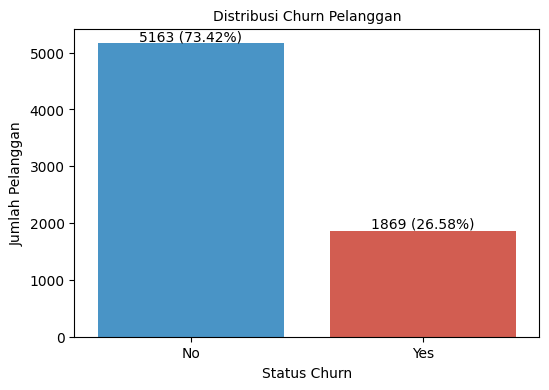

In [ ]:
# Visualisasi Persentase Churn

# Define warna
my_palette = {"No": "#3498db", "Yes": "#e74c3c"}

# Hitung Yes dan No
churn_counts = df["Churn"].value_counts()
churn_pct = df["Churn"].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))

ax = sns.countplot(x='Churn', data=df, palette=my_palette, hue=df['Churn'],legend=False)

plt.title('Distribusi Churn Pelanggan', fontsize=10)
plt.xlabel('Status Churn')
plt.ylabel('Jumlah Pelanggan')

# Anotasi count & %
for i, cat in enumerate(churn_counts.index):
    ax.text(i, churn_counts[cat], f"{churn_counts[cat]} ({churn_pct[cat]:.2f}%)", ha="center", va="bottom")

### **Distribusi Fitur Numerik**

*   `Tenure` (masa langganan) : Pola ini menjelaskan risiko Churn paling tinggi terjadi pada fase awal 6 - 10 bulan pertama. Hal ini dapat mengindikasikan bahwa customer kurang merasakan nilai produk di fase awal.
*   `MonthlyCharges` (Biaya Bulanan) : Distribusi biaya bulanan menunjukkan segmentasi pelanggan yang melakukan Churn rata-rata memiliki tagihan bulanan tinggi. Kehilangan customer dengan value tinggi dapat berdampak signifikan terhadap penurunan *revenue*.
* `Total Charges` : Secara keseluruhan, mayoritas pelanggan yang churn memiliki TotalCharges yang rendah. Namun, ditemukan juga banyak outlier pada customer churn. Hal ini menunjukkan bahwa churn tidak hanya terjadi pada pelanggan kecil, tapi juga pelanggan besar yang masuk high value customer.



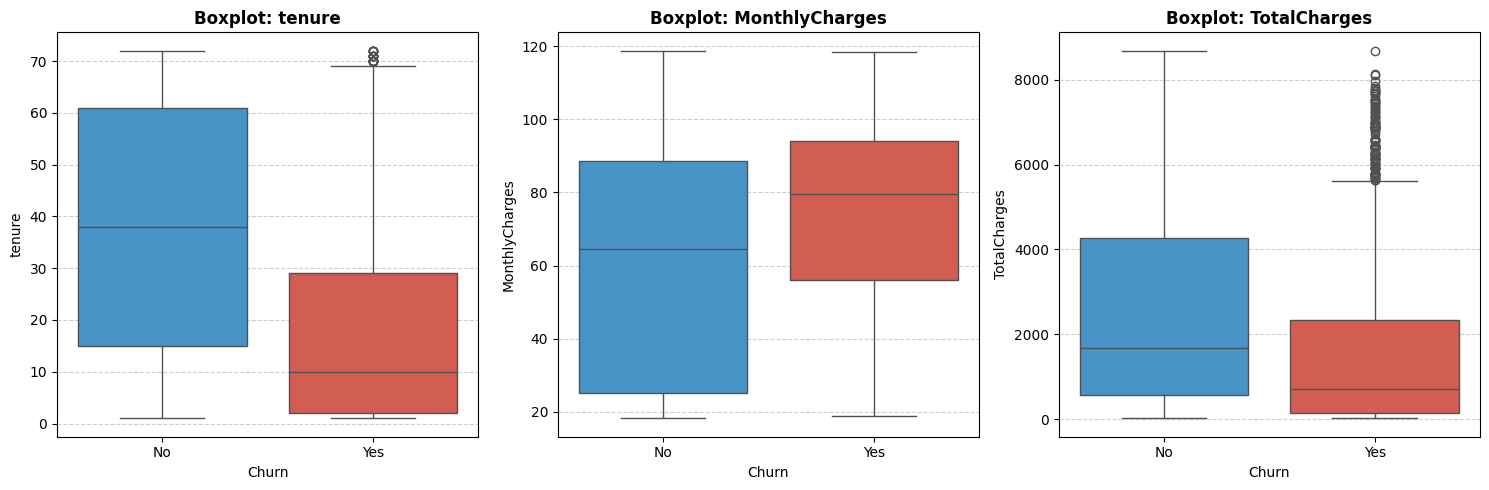

In [ ]:
# Definisi fitur numerik
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(15, 5))

# Iterasi untuk setiap kolom numerik
for i, col in enumerate(numerical_features):
    if col in df.columns:
        plt.subplot(1, 3, i + 1)

        sns.boxplot(
            x=churn_labels,
            y=df[col],
            palette=my_palette,
            showfliers=True,
            hue=churn_labels,
            legend=False
        )

        plt.title(f'Boxplot: {col}', fontsize=12, fontweight='bold')
        plt.xlabel('Churn', fontsize=10)
        plt.ylabel(col, fontsize=10)
        plt.grid(axis='y', linestyle='--', alpha=0.6) # tambah grid halus

plt.tight_layout()
plt.show()

### **Distribusi Fitur Kategorikal**

*   `Contract` : Pengguna **Month-to-month** adalah penyumbang churn terbesar. Pengguna kontrak 1 atau 2 tahun sangat jarang churn.

* `Internet` : Pengguna **Fiber optic** memiliki tingkat churn yang tinggi dibandingkan DSL. Ini bisa mengindikasikan masalah harga atau kualitas layanan pada Fiber optic.

* `PaymentMethod` : Pengguna **Electronic check** memiliki tingkat churn tertinggi dibandingkan metode otomatis lainnya.

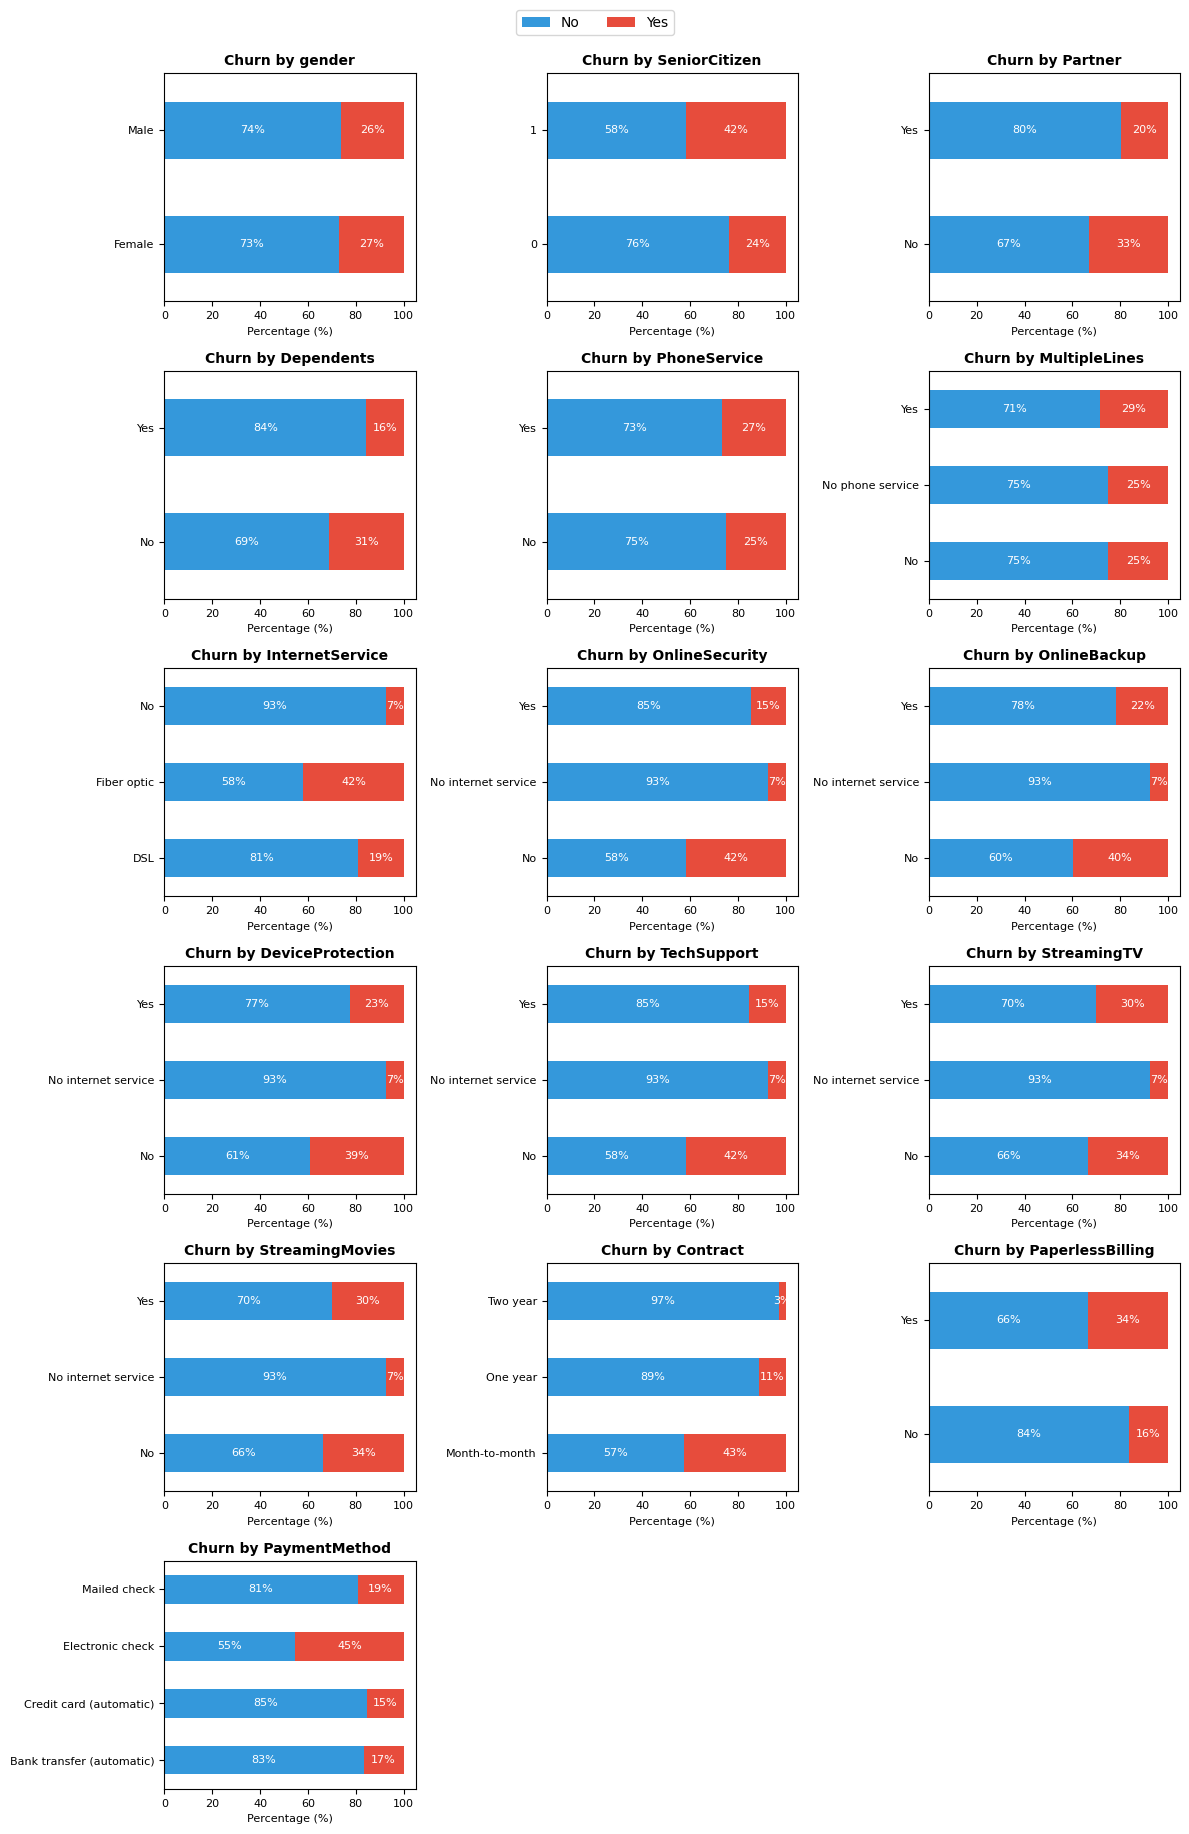

In [ ]:
# Stacked Bar Chart untuk Kolom Kategorikal

# Menentukan tampilan jumlah kolom
n_cols = 3
n_rows = math.ceil(len(cat_cols) / n_cols)

# Membuat figure dengan ukuran seragam pada tiap subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten() # Meratakan array axes

# Iterasi untuk setiap kolom
for i, col in enumerate(cat_cols):
    prop_df = pd.crosstab(df[col], df['Churn'], normalize='index') * 100

    # Plot pada axis yang spesifik (axes[i])
    prop_df.plot(
        kind='barh',
        stacked=True,
        ax=axes[i],
        legend=False,
        color=['#3498db', '#e74c3c']
    )

    # Tambahkan label angka di tengah bar
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.0f%%', label_type='center', fontsize=8, color='white')

    # Pengaturan teks dan judul
    axes[i].set_title(f'Churn by {col}', fontsize=10, fontweight='bold')
    axes[i].set_xlabel('Percentage (%)', fontsize=8)
    axes[i].set_ylabel('')
    axes[i].tick_params(labelsize=8)

# Menghapus axis yang kosong jika jumlah kolom tidak pas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menambahkan satu legend global di paling atas atau bawah
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=10, bbox_to_anchor=(0.5, 1.02))

plt.tight_layout()
plt.show()

### **Korelasi**

*   `TotalCharges` dan `tenure` memiliki korelasi positif yang sangat kuat (0.83). Semakin lama berlangganan, total bayar juga semakin naik. Sehingga berpotensi multikolinearitas saat modeling.




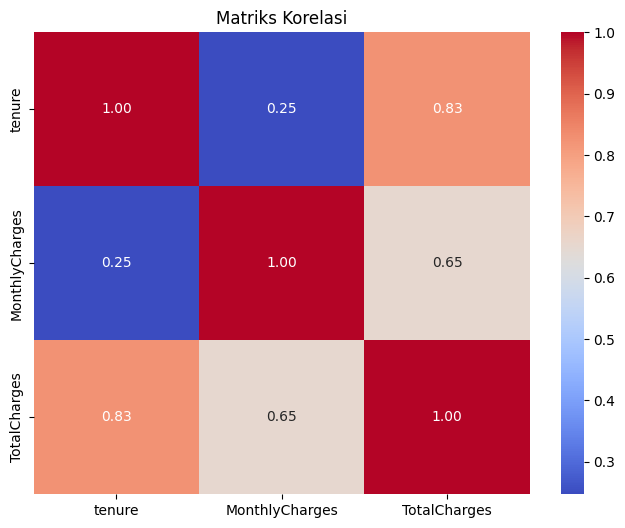

In [ ]:
plt.figure(figsize=(8, 6))
# Mengambil kolom numerik saja
corr_matrix = df_temp[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

## **Preprocessing**

Pada tahap ini dilakukan *preprocessing* data sebelum masuk ke modeling. Encode dilakukan pada kolom dengan tipe *object/string* dan mengubahnya menjadi kolom baru berisi angka 0 dan 1. Selanjutnya dilakukan split data menjadi data training dan data uji. Tahap terakhir menyamakan skala fitur numerik agar memilik rata-rata 0 dan standar deviasi 1.


In [ ]:
# Encode Target
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print(f"Data Shape: {df.shape}")
print(f"Churn Rate: {y.mean():.2%}")

Data Shape: (7032, 20)
Churn Rate: 26.58%


In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Methodology (Machine Learning)**

### **Modeling**

Model yang dipakai ada 5, yaitu logistic regression, random Forest, KNN, decision tree, dan gradient boosting. Parameter class_weight='balanced dimasukkan untuk mengatasi data yang *imbalanced*. F2-Score dipilih sebagai evaluasi metrik karena memberikan bobot yang lebih tinggi pada *recall*.
<br>

*Cross validation* juga dilakukan untuk menguji model yang paling stabil. Selanjutnya, dilakukan *Hyperparameter Tuning* pada model terbaik. Didapatkan model terbaik adalah  **Logistic Regression** memiliki F2-Score yang paling stabil sebagai berikut
*   Logistic Regression - Train F2: 0.7314
*   Logistic Regression - Test F2: 0.7085
*   Gap: 0.0229



In [ ]:
f2_scorer = make_scorer(fbeta_score, beta=2)

models = {
    'Logistic Regression (Balanced)': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Random Forest (Balanced)': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'Decision Tree (Balanced)': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    y_pred_awal = model.predict(X_train_scaled)

    score_awal = fbeta_score(y_train, y_pred_awal, beta=2)
    print(f"{name}: {score_awal:.4f}")

Logistic Regression (Balanced): 0.7314
Random Forest (Balanced): 0.9977
KNN: 0.6535
Decision Tree (Balanced): 0.9984
Gradient Boosting: 0.5860


### **Cross-Validation**

In [ ]:
# Cross Validation Comparison
cv_results = {}
for name, model in models.items():
  scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring=f2_scorer)
  cv_results[name] = scores

# Ubah dictionary ke DataFrame
cv_df = pd.DataFrame(cv_results)

# Hitung Mean
print("Analisis Statistik Cross Validation:")
print(cv_df.mean().sort_values(ascending=False))


Analisis Statistik Cross Validation:
Logistic Regression (Balanced)    0.725091
Gradient Boosting                 0.538502
KNN                               0.530998
Random Forest (Balanced)          0.503346
Decision Tree (Balanced)          0.488972
dtype: float64


### **Hyperparameter Tuning**

In [ ]:
param_grid = [
    {
        'C': [0.1, 1, 10],
        'penalty': ['l2']
    }
]
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'),
                           param_grid, cv=5, scoring=f2_scorer)

grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
print(f"Best Params: {grid_search.best_params_}")

Best Params: {'C': 1, 'penalty': 'l2'}


### **Final Model**

In [ ]:
# Prediksi pada data Training
y_pred_train = best_model.predict(X_train_scaled)
train_f2 = fbeta_score(y_train, y_pred_train, beta=2)

# Prediksi pada data Test
y_pred_test = best_model.predict(X_test_scaled)
test_f2 = fbeta_score(y_test, y_pred_test, beta=2)

print(f"Logistic Regression - Train F2: {train_f2:.4f}")
print(f"Logistic Regression - Test F2: {test_f2:.4f}")
print(f"Gap: {train_f2 - test_f2:.4f}")

Logistic Regression - Train F2: 0.7314
Logistic Regression - Test F2: 0.7085
Gap: 0.0229


### **Perbandingan Performa Model**


Pada tahap ini, dilakukan evaluasi komparatif terhadap kinerja 5 model yang telah melalui proses *Cross-Validation (CV)*. Logistic Regression adalah model yang memiliki F2-score paling tinggi dan stabil (gap 0.01 dengan data training).

### **Tabel Evaluasi Komparatif Kinerja Model**

| Model | Training F2-Score | CV F2-Score (Mean) | Gap (Stability) |
| :--- | :---: | :---: | :---: |
| **Logistic Regression** | **0.73** | **0.72** | **0.01** |
| Random Forest | 0.99 | 0.50 | 0.49 |
| KNN | 0.65 | 0.53 | 0.12 |
| Decision Tree | 0.99 | 0.48 | 0.51 |
| Gradient Boosting | 0.58 | 0.53 | 0.05 |


### **Confusion Matrix**

Berdasarkan *confusion matrix* dapat diketahui untuk pelanggan yang gagal prediksi (prediksi tidak churn, aktualnya churn) hanya berjumlah 79 dari data test. Hal ini menunjukkan model cukup bagus dalam menangkap potensi customer yang churn.

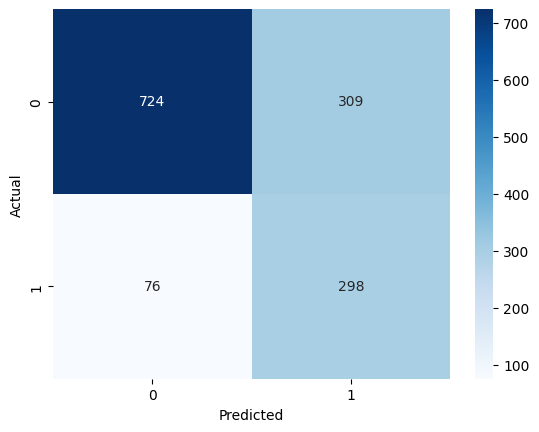

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **Interpretable SHAP**

Berdasarkan hasil SHAP, **tenure** adalah faktor paling berpengaruh. Terlihat bahwa nilai fitur yang rendah (warna biru) terkonsentrasi di sisi kanan (positif), mengindikasikan bahwa pelanggan baru memiliki risiko churn yang sangat tinggi. Sementara itu, pada TotalCharges, risiko churn justru didominasi oleh pelanggan dengan tagihan rendah, yang menunjukkan kurangnya loyalitas pada segmen pengguna layanan dasar.

Pada grafik SHAP, TotalCharges (merah di kanan) lebih dominan menjelaskan risiko biaya tinggi. Sehingga, asumsi kami hal ini terjadi karena pada MonthlyCharges, model menangkap risiko dari pelanggan biaya rendah yang bersifat tidak loyal (titik biru di sisi kanan).

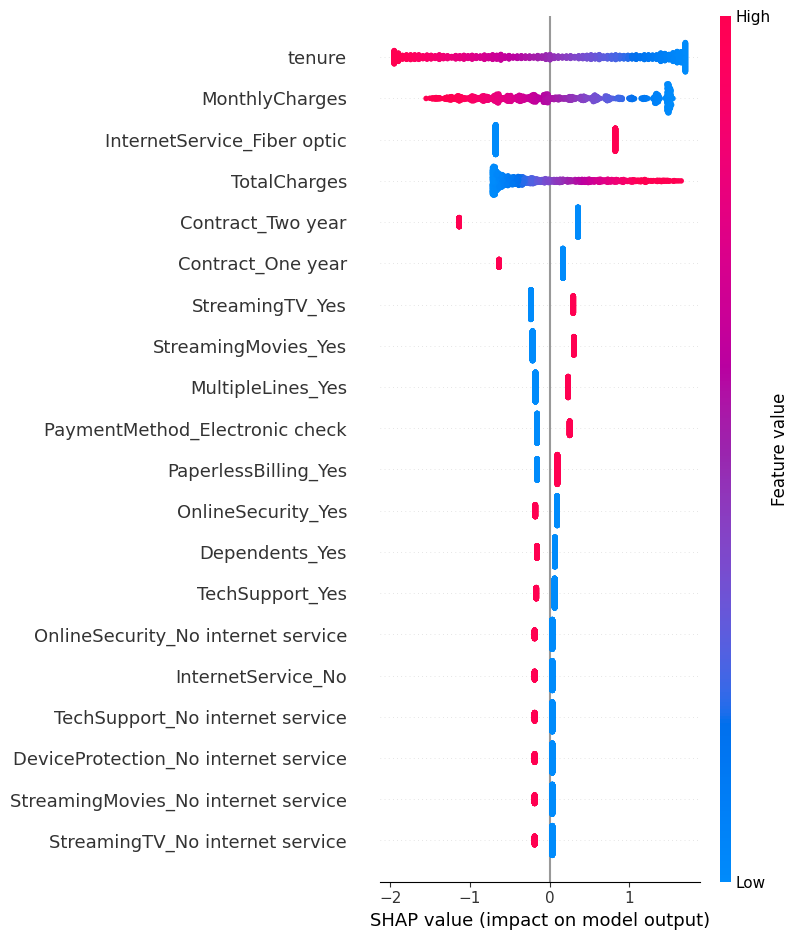

In [ ]:
import shap

explainer = shap.LinearExplainer(best_model, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

# Tampilan Kiri-Kanan (Summary Plot)
# Merah (Kanan): Meningkatkan peluang Churn
# Biru (Kiri): Mengurangi peluang Churn
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

## **Conclusion & Recommendation**



A. Kesimpulan Model:
*  Model Terbaik: **Logistic Regression (Balanced)** terpilih sebagai model final karena memiliki **F2-Score** yang paling stabil **(0.72 - 0.73)** dibandingkan model kompleks lainnya seperti Random Forest yang mengalami *overfitting*.
*  Penggunaan metrik F2-Score berhasil meningkatkan daya tangkap model terhadap pelanggan yang akan churn (Recall).
<br>

B. Kesimpulan Bisnis :
* Karakteristik Utama Churner: Berdasarkan analisis SHAP dan EDA, pelanggan yang paling rentan churn adalah mereka yang:
1.   Memiliki kontrak Month-to-month (fleksibel/tidak terikat)
2.   Menggunakan layanan Fiber Optic (diduga karena harga tinggi atau masalah teknis).
3.   Memiliki Tenure rendah (pelanggan baru di bawah 12 bulan).
2.   Memiliki Monthly Charges yang tinggi

<br>

C. Rekomendasi Aksi (Actionable Insights):
1.   Strategi Retensi Berdasarkan Kontrak
*   **Incentive Program** : Diskon atau bonus bagi pelanggan ***Month-to-month*** yang bersedia beralih kontrak 1 atau 2 tahun
*   **Early Intervention** : Menggunakan model untuk mendeteksi pelanggan ***Month-to-month*** yang skor risikonya > 0.7 *(daftar prioritas)*, kemudian mengirimkan penawaran secara personal sebelum masuk ke periode penagihan


2.   Fokus pada Pelanggan Baru (Low Tenure)
*   **Loyalty Program** : Membuat program loyalitas khusus untuk pelanggan di 6 bulan pertama. Berikan reward progresif setiap mereka mencapai bulan ke-3, ke-6, dan ke-12.
*   **Proactive Support** : Memastikan tim teknis melakukan *follow-up* rutin kepada pelanggan baru untuk memastikan kualitas instalasi dan koneksi stabil di fase awal penggunaann.

3.   Evaluasi Layanan Fiber Optic
*   Berdasarkan penemuan dari EDA, customer pengguna *Fiber Optic* cenderung lebih banyak churn. Sehingga, tim produk perlu melakukan ***investigasi* terhadap stabilitas jaringan dan harga yang mungkin tidak kompetitif dibandingkan kompetitor
*   Menawarkan **paket bundling***Fiber Optic* dengan layanan lain seperti langganan streaming online Netflix, disney, dll.

4.  Optimasi Biaya Pemasaran
*   **Targeted Promotion** : Tim marketing hanya perlu fokus memberikan promo kepada pelanggan yang masuk kategori High Risk dan High Value (berdasarkan skor model).








### Simulasi Impact Bisnis

### **C. Simulasi Impact Bisnis (Recall 70%)**
* **Total Pelanggan:** 7,043
* **Actual Churners:** 1,866 pelanggan (26.5%)
* **Model Recall (70%):** Model mendeteksi 1,306 orang, sementara 560 orang terlewat (False Negative).
* **Retention Success (80%):** Dari 1,306 orang yang diberi promo, 1,045 bertahan dan 261 tetap pergi.

| Komponen | Reaktif (Tanpa Model) | Proaktif (Dengan Model) |
| :--- | :--- | :--- |
| **Deteksi Churn (Recall 70%)** | 0 (Tidak dideteksi) | 1,306 (Terdeteksi) |
| **Biaya Intervensi** | Rp0 | Rp130.600.000 (1,306 user x Rp100rb) |
| **Kerugian CLV (821 user)** | Rp5.598.000.000 (Semua 1,866 lost) | Rp2.463.000.000 (560 missed + 261 failed) |
| **Biaya Akuisisi Baru (CAC)** | Rp2.799.000.000 (Ganti 1,866 user) | Rp1.231.500.000 (Hanya ganti 821 user) |
| **Total Pengeluaran** | **Rp8.397.000.000** | **Rp3.825.100.000** |
| **Efisiensi (Savings)** | - | **Rp4.571.900.000 (Hemat ~54%)** |



## **Menyimpan Model**

In [ ]:
import os, joblib, zipfile

ARTIFACT_DIR = "artifacts"
os.makedirs(ARTIFACT_DIR, exist_ok=True)

# --- 1) Simpan model + scaler ---
joblib.dump(best_model, os.path.join(ARTIFACT_DIR, "best_model.joblib"))
joblib.dump(scaler,     os.path.join(ARTIFACT_DIR, "scaler.joblib"))

# --- 2) simpan urutan kolom fitur ---
try:
    joblib.dump(list(X_train.columns), os.path.join(ARTIFACT_DIR, "feature_columns.joblib"))
    has_cols = True
except Exception:
    has_cols = False

# --- 3) Zip semua artifact ---
zip_path = "telco_churn_artifacts.zip"
with zipfile.ZipFile(zip_path, "w", zipfile.ZIP_DEFLATED) as z:
    z.write(os.path.join(ARTIFACT_DIR, "best_model.joblib"), arcname="best_model.joblib")
    z.write(os.path.join(ARTIFACT_DIR, "scaler.joblib"), arcname="scaler.joblib")
    if has_cols:
        z.write(os.path.join(ARTIFACT_DIR, "feature_columns.joblib"), arcname="feature_columns.joblib")

print("✅ Artifacts zipped:", zip_path)

# --- 4) Link download (Jupyter) ---
try:
    from google.colab import files
    files.download(zip_path)
except Exception:
    from IPython.display import FileLink, display
    display(FileLink(zip_path))

✅ Artifacts zipped: telco_churn_artifacts.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>